#計算機程式設計二
#第二週上課內容

###GitHub 教材參考資料

[i2p-nthu 程式設計二 linked lists 補充說明](https://github.com/htchen/i2p-nthu/blob/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%BA%8C/mid1/2-linked_list_sup.md)





##Example 1

##有關 linked lists 的補充說明

我們再補充說明另外一種和上一堂課介紹的作法稍微不同的 linked lists 實作方式。
上次的例子，會把更改過後的 list 的開頭位址用 `return` 的方式傳回到 `main`，例如 `head = removeFirst(head);`，但是另一種可能的方式，則是透過參數，傳遞某個指標變數的位址，以便修改函數外部的指標變數。

這裡採用的 linked list 的基本單位是 `Node`

```c
typedef struct _Node {
	int data;
	struct _Node *next;
} Node;
```

需要實作的函數是

```c
void insert_increase_list(Node**, int);
```

第一個參數有兩個星號，表示傳入的資訊是某個指標變數的位址。乍看之下有點奇怪，但其實很合理。指標變數的作用是記住某個記憶體位址，但是既然指標變數也是一個變數，自己也會占據記憶體的某塊空間，因此指標變數也會有位址。假設某個指標變數的型別是 `int *` (指向整數的指標)，這個指標變數的位址的型別就會是 `int * *`。


In [ ]:
%%writefile E03_01.c
#include <stdio.h>
#include <stdlib.h>

typedef struct _Node {
    int data;
    struct _Node *next;
} Node;

void insert_increase_list(Node**, int);
void show_list(Node* );
void delete_node(Node**, int);

Node *create_node(int x)
{
  Node *n = (Node*) malloc(sizeof(Node));
  n->data = x;
  n->next = NULL;
  return n;
}
void insert_increase_list(Node** hp, int x)
{
  if (*hp == NULL) *hp = create_node(x);
  else {
    Node * q;
    Node * prev = NULL;
    q = *hp;
    while (q != NULL && q->data <= x) {
      prev = q;
      q = q->next;
    }
    if (prev == NULL) {
      prev = create_node(x);
      prev->next = *hp;
      *hp = prev;
    } else {
      prev->next = create_node(x);
      prev->next->next = q;
    }
  }
}

void delete_node(Node** pp, int x)
{
  if (*pp == NULL) return;
  else {
    Node * q;
    q = *pp;
    while (q) {
      if (q->data == x) {
        *pp = q->next;
        free(q);
      } else {
        pp = &(q->next);
      }
      q = *pp;

/*
      0xf1
      3               0xf3
      0xf2            4
      next=0xf5       0xf4
                      next=0xf5     0xf5
                                    5
                                    0xf6
                                    next=NULL
*/
    }
  }
}

void show_list(Node *p)
{
  while(p != NULL) {
    printf("{%d, next--}-->", p->data);
    p = p->next;
  }
  printf("\n");
}

int main(void)
{
  int x;
  Node * head = NULL;
  while (scanf("%d", &x)==1) {
    insert_increase_list(&head, x);
  }
  while(getchar()!='\n');

  show_list(head);
  scanf("%d", &x);
  delete_node(&head, x);
  show_list(head);

  return 0;
}


Overwriting E03_01.c


In [ ]:
%%shell
gcc -o E03_01 E03_01.c
./E03_01


1 2 3 5 8 8 9 q
{1, next--}-->{2, next--}-->{3, next--}-->{5, next--}-->{8, next--}-->{8, next--}-->{9, next--}-->
8
{1, next--}-->{2, next--}-->{3, next--}-->{5, next--}-->{9, next--}-->


In [ ]:
%%writefile E03_01.c
#include <stdio.h>
#include <stdlib.h>

typedef struct _Node {
    int data;
    struct _Node *next;
} Node;

void insert_increase_list(Node**, int);
void show_list(Node* );
void deleteNode(Node**, int);

Node* create_node(int data)
{
    Node* p = (Node*) malloc(sizeof(Node));
    p->data = data;
    p->next = NULL;
    return p;
}

void insert_increase_list(Node** hp, int data)
{
    // hp = &head;
    // *hp is head (main head)
    // the value stored in local_head is the same as in head

    Node* local_head = *hp;
    Node  *q, *pre, *cur;

    pre = NULL;
    q = local_head;

    while (q != NULL && data > q->data) {
        pre = q;
        q = q->next;
    }
    cur = create_node(data);
    cur->next = q;
    if (pre==NULL) {
        local_head = cur;
    } else {
        pre->next = cur;
    }

    *hp = local_head;
}

void deleteNode(Node** hp, int data)
{
    Node *local_head;
    Node  *q, *pre;
    local_head = *hp; //*&main_head  main_head

    pre = NULL;
    q = local_head;
    while (q != NULL && data != q->data) {
        pre = q;
        q = q->next;
    }
    if (q != NULL) {
        if (pre == NULL) {
            local_head = q->next;
        } else {
            pre->next = q->next;
        }
        free(q);
    }

    *hp = local_head; // main_head = local_head
}

void show_list(Node* p)
{
    while (p != NULL) {
        printf("Node{%d, next--}-->", p->data);
        p = p->next;
    }
    printf("NULL\n");
}

int main(void)
{
    Node* head = NULL;
    insert_increase_list(&head, 2);
    insert_increase_list(&head, 3);
    insert_increase_list(&head, 4);
    insert_increase_list(&head, 1);
    show_list(head);
    deleteNode(&head, 5);
    show_list(head);
}

Overwriting E03_01.c


In [ ]:
%%shell
gcc -o E03_01 E03_01.c
./E03_01

Node{1, next--}-->Node{2, next--}-->Node{3, next--}-->Node{4, next--}-->NULL
Node{1, next--}-->Node{2, next--}-->Node{3, next--}-->Node{4, next--}-->NULL


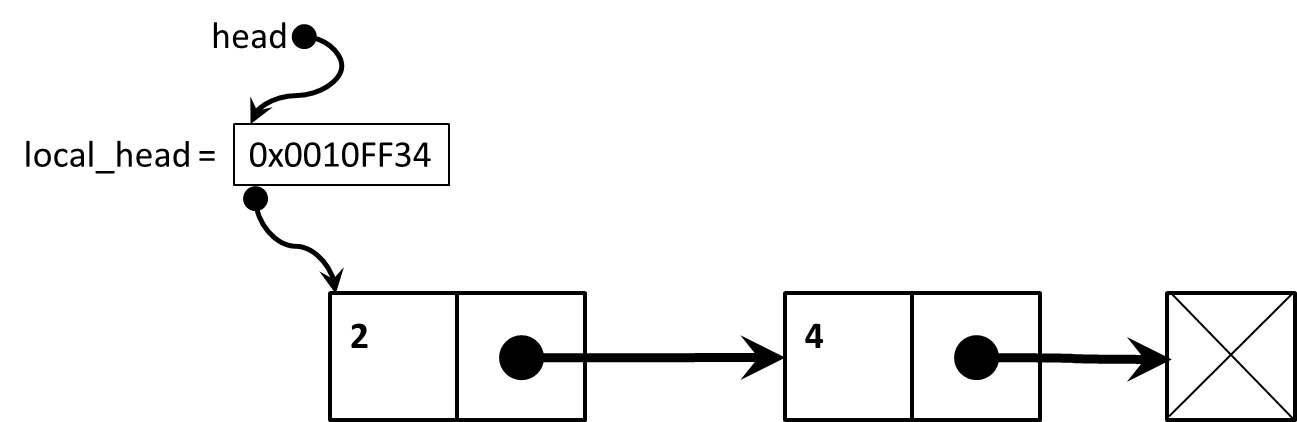


針對這個例子再說明一次:
之所以需要傳入指標變數的位址，是為了修改函數外部某個指標的值。我們必須透過指標變數的位址，才能找到那個外部的變數。回想上學期 `swap(a,b)` 的例子，假如有兩個 `int` 變數 `a` 和 `b`，希望透過呼叫 `swap` 將兩的變數的內容交換，正確的寫法應該是，`swap(&a,&b)` 將 `a` 和 `b` 的位址告訴 `swap`，所以 `swap` 的參數型態應該是 `swap(int *, int *)`，才能夠接收傳入的位址。

對於作業的例子來說，由於 `main` 裡面的變數 `head` 自己已經是指標變數，它的型別是 `Node* head`，而 `insert_increase_list` 使用的時候像底下這樣

```c
insert_increase_list(&head, data);  // head: Node*    &head: Node**
```

傳入的是 `&head`，也就是變數 `head` 的位址，因此對應的參數型別應該是 `Node* *`，這樣才符合 `&head` 的型別，也才能正確接收傳入的資訊--指標變數的位址。

#####寫出 insert_increase_list，將資料新增到 list 中，並維持遞增性質
建議先做底下的設定

```c
void insert_increase_list(Node** hp, int data)
{
  Node* local_head;
  local_head = *hp;  // hp=&head    *hp==head  ==>  local_head=head
    
    // 其他程式碼
    
  *hp = local_head;  //  head=local_head
}
```

先宣告一個函數內的局部指標變數 `Node *local_head`。然後從傳入的參數 `hp`(也是個指標變數) 所記住的位址，找到該位址裡面所存放的數值，也就是取出 `*hp`，這件事通常簡稱為 "取出 `hp` 所"指到"的值"。而`*hp`的值，其實也是某個記憶體位址，也就是 `main` 裡面保存的某個 linked list 的開頭位址。因此 `local_head = *hp;` 就是為了把外面傳入的 linked list 開頭位址，設定給 `head`，這樣我們對 linked list 做一些我們想要的操作和更改。
函數呼叫的最後，則要做 `*hp = local_head;`，因為做完 insert 可能會動到 linked list 的開頭，所以要把更新之後的 `local_head`，存回 `*hp`，這樣 `main` 裡面的 `head` 才會被更改。

中間那段 `// 其他程式碼` 是重點，請自己設法寫出來。

*基本想法:*

1. 如果 `local_head` 是 `NULL` 表示 list 是空的，這時候應該要用 `malloc` 造出一個新的 `Node`，構成一個只有單一 `Node` 的新 list。
2. 如果 `local_head` 所指到的 list 已經有東西，就要設法循序查看 list，找到安插 `data` 的地方。這裡會有兩種情況需要考慮。
   2.1 如果要安插的地方剛在 list 的最開頭，也就是傳入的 `data` 比 list 裡既有的數值都還小，所以要排在最前面。這時候應該要用 `malloc` 產生新的 `Node`，然後把原有的 list 接在這個 `Node` 的後面，並且把 `local_head` 改指向新的 `Node`。
   2.2 如果要安插的地方是在 list 的其他地方，這時候做法比較簡單，只要設法把 list 串起來就行了， `local_head` 不需要改變。但是有一個小細節要注意，不能只記住目前正在比較大小的 `Node`，還要記住前一個 `Node` 在哪裡，才能夠串得起來。


*上述 2.1 的情況如下*
原本是

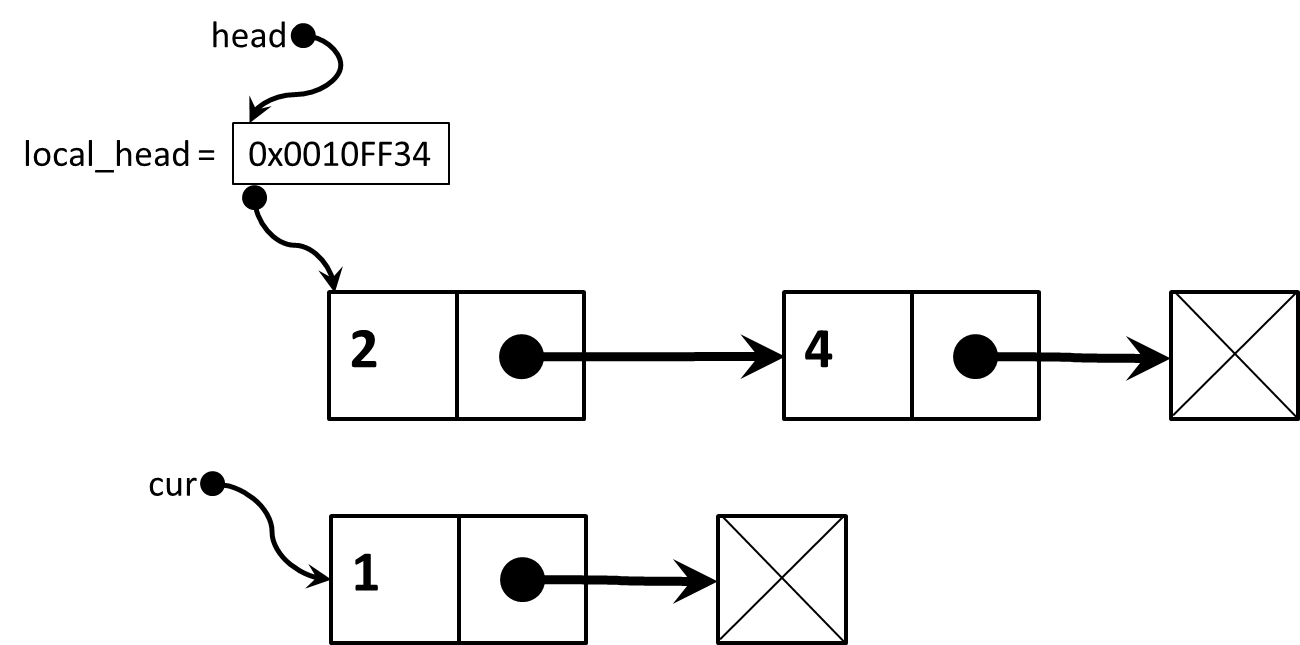

變成

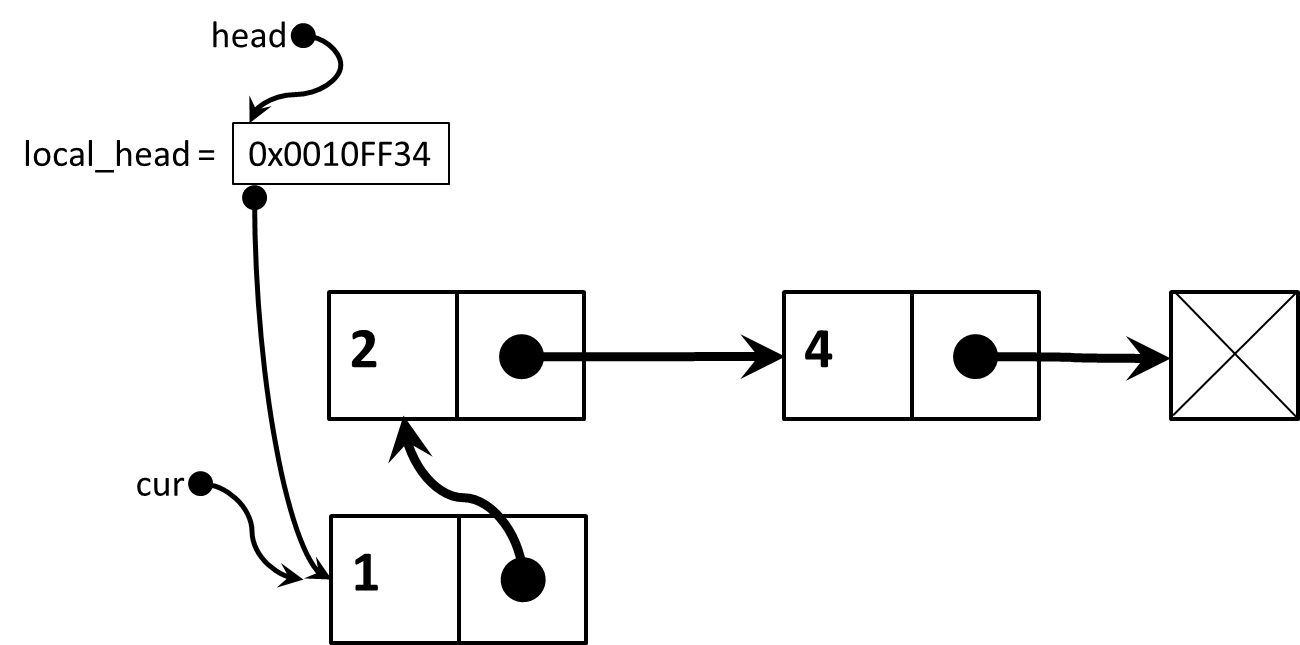

*上述 2.2 的情況如下*
原本是

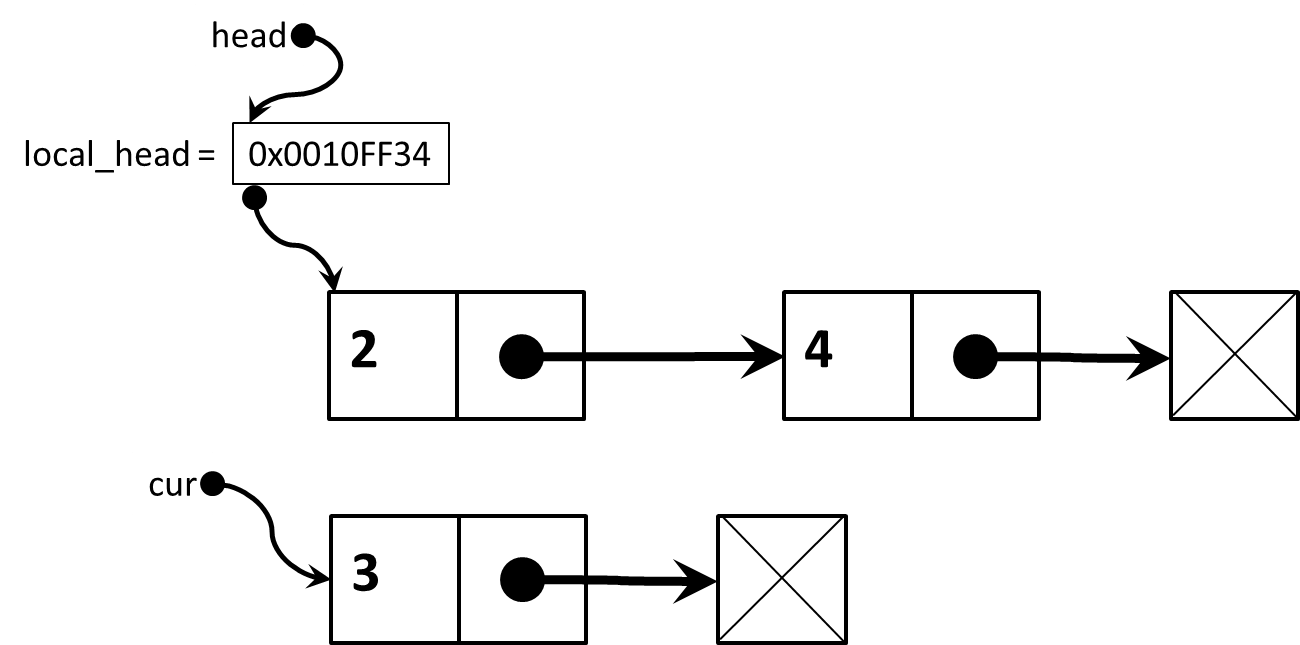

變成

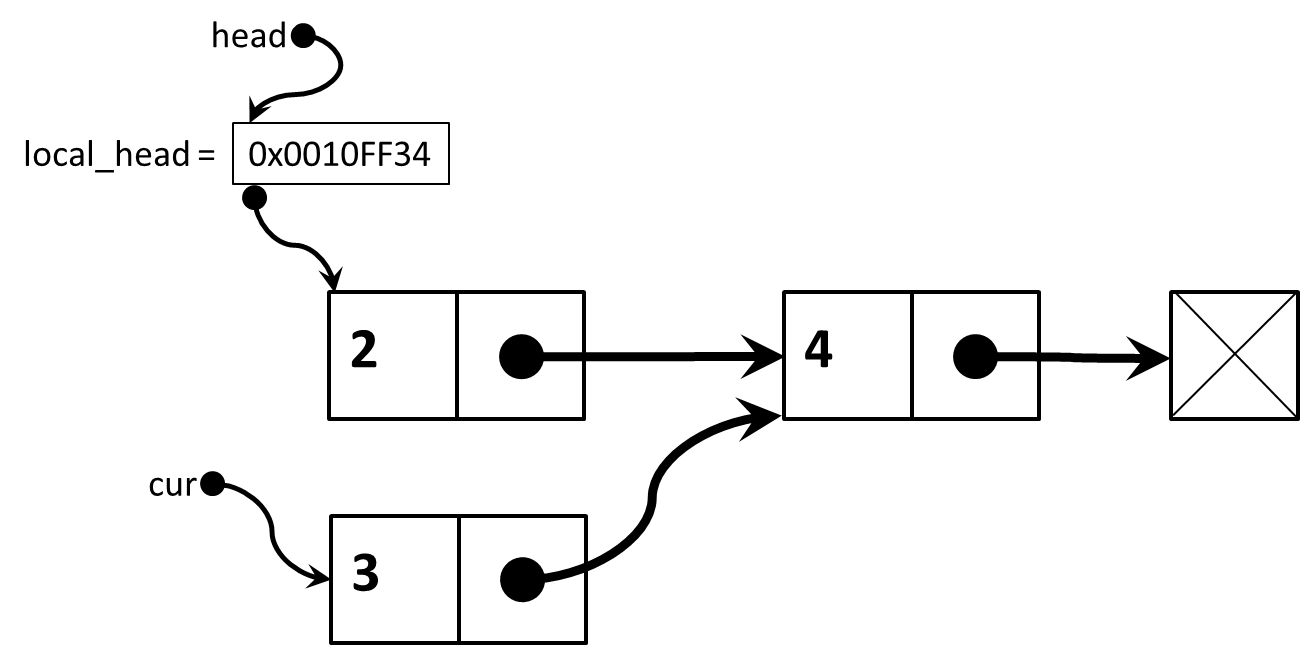

然後是

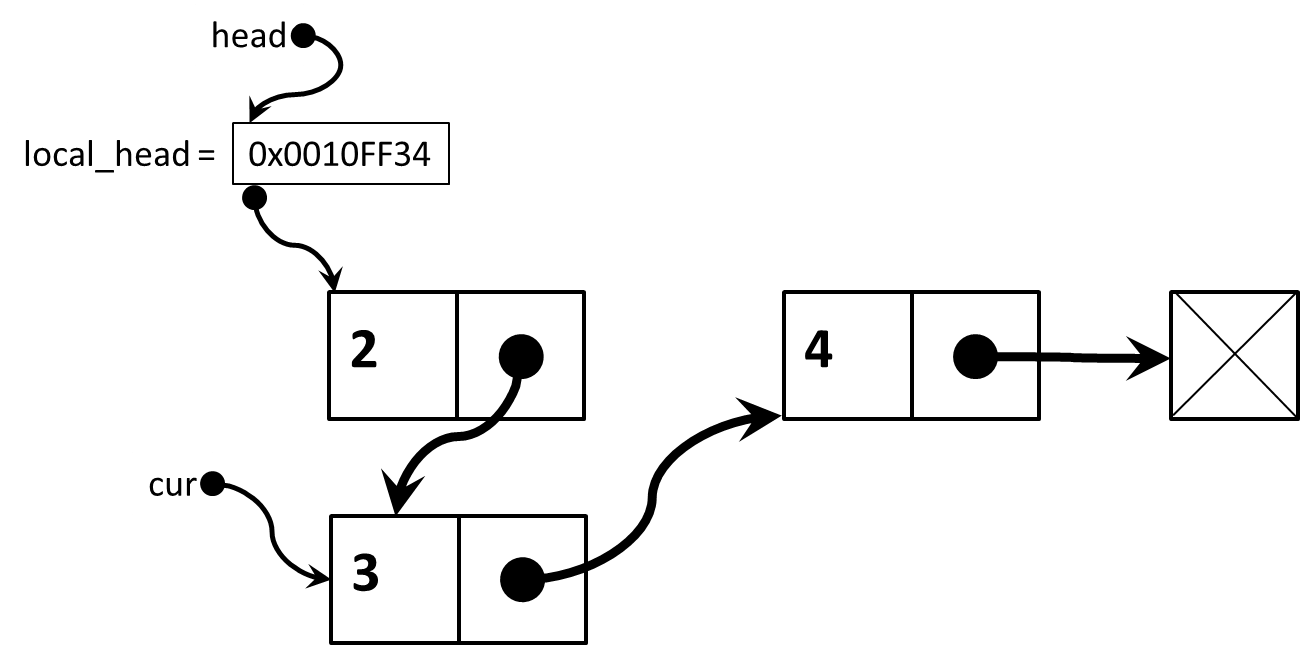


#####再用圖例來比較一個星號和兩個星號兩種寫法的差異

如果 `deleteNode` 的參數的 type 是 `Node*`
使用方式可能像底下的程式寫法

```c
int main(void)
{
	Node *main_head;
	...
	deleteNode(main_head, 1);
	...
}
...
void deleteNode(Node * np, int idx)
{
	...
    np = ...
}
```


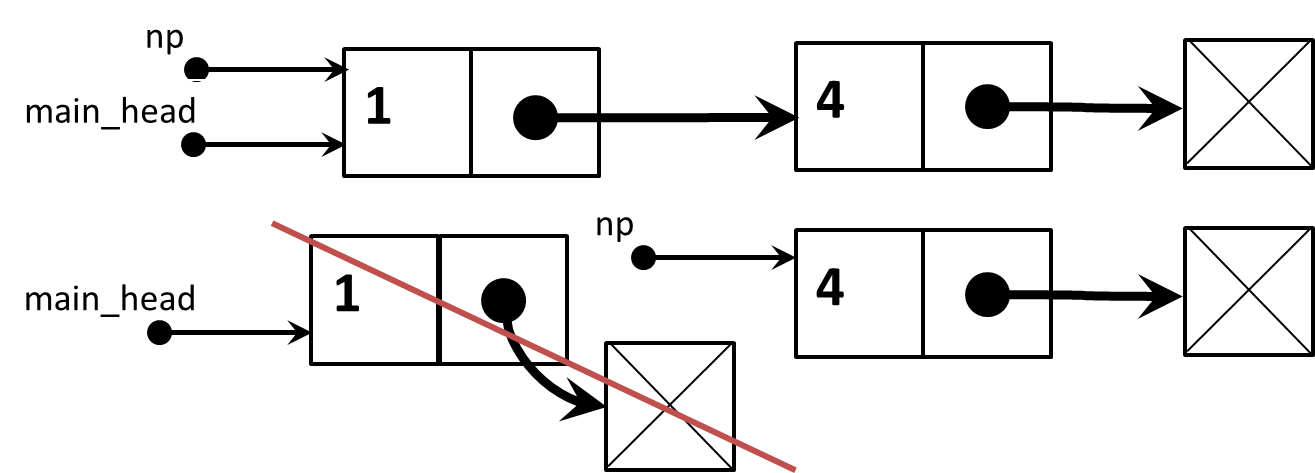

呼叫的時候傳入的是指標 `main_head`，而指標變數`main_head`的值是記憶體位址，在這個例子裏是 list 的第一個`Node`的位址，假設是`0X10FF3040`。呼叫之後進入`deleteNode(Node *np)`，所以`np`會取得`0X10FF3040`這個值，意義上就是`np`和`main_head`指向同一個`Node`位址。假設移除了第一個`Node`，所以`np`會被更新，變成指向下一個`Node`，不過`main_head`並不會被更改。而且如果原本的第一個`Node`已經被`free`，指標變數`main_head`的值`0X10FF3040`已經變成了一個不合法的記憶體位址。所以，整個程式會出錯。
為了讓`main_head`可以得到正確的值，第一種改寫方式是

```c
int main(void)
{
	Node *main_head;
	...
	main_head = deleteNode(main_head, 1);
	...
}
...
Node* deleteNode(Node * np, int idx)
{
	...
    np = ...
    ...
    return np;
}
```
`deleteNode`必須傳回更新之後的位址，然後在`main`裡面要接收傳回來的值。
​    
另一種改寫方式則是用兩個星號，在`main`裡面，呼叫`deleteNode`的時候傳入的是`&main_head`，也就是`main_head`的位址 (type 會是 `Node**`)。

```c
int main(void)
{
	Node *  main_head;
	...
	deleteNode(&main_head, 1);
	...
}
...
void deleteNode(Node * * npp, int idx)
{
	Node *local_head;
  local_head = *npp; //*&main_head  main_head
    ...
    local_head = ...
    ...
  *npp = local_head; // main_head = local_head
}
```


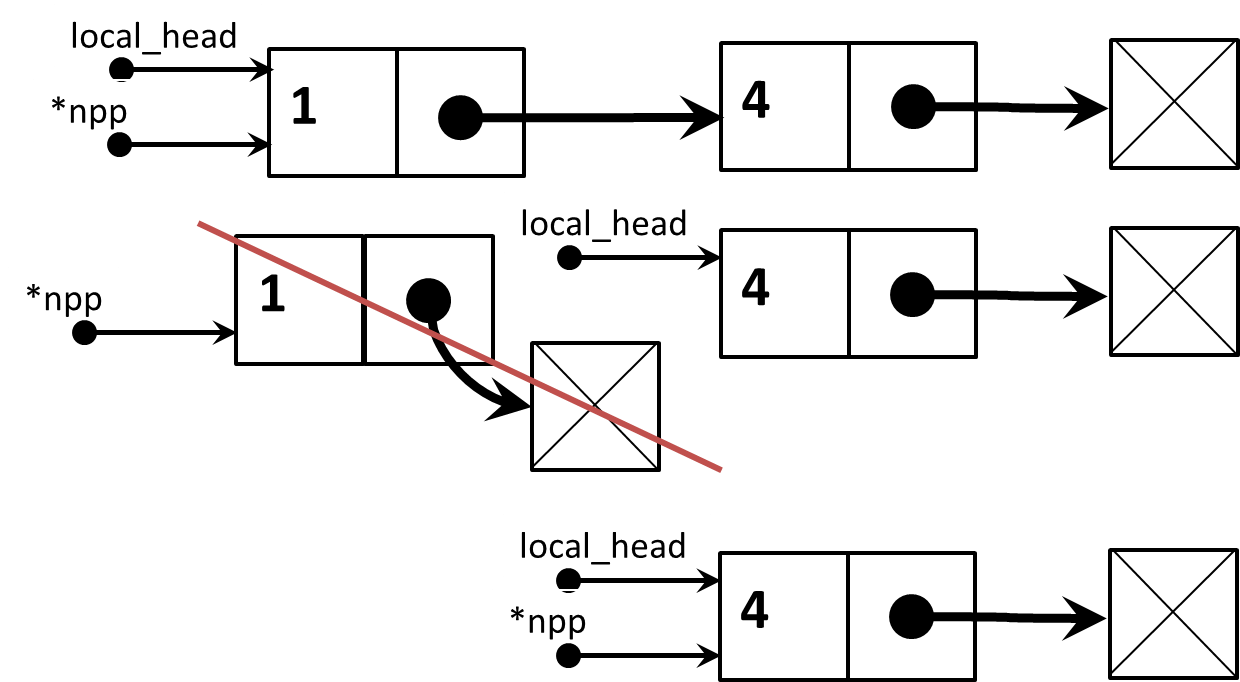

***
#####再一個關於兩個星號的練習

變數宣告的時候
只要有星號
就表示是指標變數

假設 `Node * p;`
因此 `p` 是一個指標變數，可以用來記住某個 type 是 `Node`的東西的位址
例如 `p = (Node*) malloc(sizeof(Node));`

至於 `Node * * pp;`
`pp` 也是指標變數，可以用來記住某個 type 是 `(Node *)` 的東西的位址
例如 `pp = &p;`
`p` 的 type 是 `Node*`
所以 `&p` 的 type 是 `(Node *) *`
剛好和 `pp` 的 type 一樣
所以可以做 `pp = &p;`
用 `pp` 去記住 `p` 的位址

```c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct {
	int data;
	char str[10];
} Node;

void print(Node *p)
{
	printf("%s= %d\n", p->str, p->data);
}

void swap1(Node * p, Node *q)
{
	Node *tmp;
	tmp = p;
	p = q;
	q = tmp;
}

void swap2(Node **pp, Node **qq)
{
	Node *tmp;
	tmp = *pp;
	*pp = *qq;
	*qq = tmp;
}

int main(void)
{
	Node *x, *y;

	x = (Node*) malloc(sizeof(Node));
	x->data = 100;
	strcpy(x->str, "Alice");

	y = (Node*) malloc(sizeof(Node));
	y->data = 200;
	strcpy(y->str, "Bob");

  printf("Original\n");
	print(x);
	print(y);

	printf("\nAfter swap1\n");
	swap1(x, y);
	print(x);
	print(y);

	printf("\nAfter swap2\n");
	swap2(&x, &y);
	print(x);
	print(y);

	return 0;
}
```

----

`swap2` 也可以用比較冗長的方式來寫
中間那三行跟 `swap1` 一模一樣

	void swap2(Node **pp, Node **qq)
	{
		Node *tmp, *p, *q;
		p = *pp;
		q = *qq;

		tmp = p;
		p = q;
		q = tmp;

		*pp = p;
		*qq = q;
	}

​    


In [ ]:
%%writefile test.c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct _Node {
  int data;
  char *str;
} Node;

struct TwoNodePtr {
  Node *first;
  Node *second;
};

Node * create_node(void)
{
    int x, m;
    char a[255];
    scanf("%d", &x);
    scanf("%s", a);
    Node * n = (Node *)malloc(sizeof(Node));
    n->data = x;
    n->str = (char *) malloc(sizeof(char)*(strlen(a)+1));
    strcpy(n->str, a);
    return n;
}
void show(Node *p)
{
  printf("%d, %s\n", p->data, p->str);
}

void swap(Node * *a, Node * *b)
{
  struct TwoNodePtr tnp = {*b, *a};
  *a = tnp.first;
  *b = tnp.second;
}

int main(void)
{
  Node *s1, *s2;
  struct TwoNodePtr tnp;
  s1 = create_node();
  s2 = create_node();
  show(s1);
  show(s2);
  swap(&s1, &s2);
  show(s1);
  show(s2);
}

Overwriting test.c


In [ ]:
%%shell
gcc -o test test.c
./test


100 nerf
200 diffusion
100, nerf
200, diffusion
200, diffusion
100, nerf



Linus Torvalds on understanding pointers

範例：https://grisha.org/blog/2013/04/02/linus-on-understanding-pointers/



底下的程式碼節錄至 Grisha Trubetskoy 的部落格



```c
typedef struct list_entry {
    int val;
    struct list_entry *next;
} list_entry;
```



"Bad taste"

```c
list_entry *entry = head; /* assuming head exists and is the first entry of the list */
list_entry *prev = NULL;

while (entry) {
    if (entry->val == to_remove) /* this is the one to remove */
        if (prev)
           prev->next = entry->next; /* remove the entry */
        else
            head = entry->next; /* special case - first entry */

    /* move on to the next entry */
    prev = entry;
    entry = entry->next;
}
```



"Good taste"

```c
list_entry **pp = &head; /* pointer to a pointer */
list_entry *entry = head;

while (entry) {
    if (entry->val == to_remove)
        *pp = entry->next;

    pp = &(entry->next);
    entry = entry->next;
}
```


##### 練習

試著模仿 "Good taste" 的寫法，用同樣的概念改寫前面寫過的
 `void insert_increase_list(Node** npp, int data)`

In [ ]:
%%writefile E03_02.c
#include <stdio.h>
#include <stdlib.h>

typedef struct _Node {
    int data;
    struct _Node *next;
} Node;

void insert_increase_list(Node**, int);
void show_list(Node* );
void deleteNode(Node**, int);

Node* create_node(int data)
{
    Node* p = (Node*) malloc(sizeof(Node));
    p->data = data;
    p->next = NULL;
    return p;
}

void insert_increase_list(Node** hp, int data)
{
    // hp = &head;
    // *hp is head (main head)
    // the value stored in local_head is the same as in head

    Node* local_head = *hp;
    Node  *q, *cur;
    Node* *pre;

    pre = &local_head;
    q = local_head;

    while (q != NULL && data > q->data) {
        pre = &(q->next);
        q = q->next;
    }
    cur = create_node(data);
    cur->next = q;
    *pre = cur;

    *hp = local_head;
}

void deleteNode(Node** hp, int data)
{
    Node *local_head;
    Node  *q;
    Node* *pre;

    local_head = *hp; //*&main_head  main_head
    pre = &local_head; // 0x1234: 0x9988 : {int data, Node* next}

    q = local_head;
    while (q != NULL && data != q->data) {
        pre = &(q->next);
        q = q->next;
    }
    if (q != NULL) {
        *pre = q->next;
        free(q);
    }

    *hp = local_head; // main_head = local_head
}

void show_list(Node* p)
{
    while (p != NULL) {
        printf("Node{%d, next--}-->", p->data);
        p = p->next;
    }
    printf("NULL\n");
}

int main(void)
{
    Node* head = NULL;
    insert_increase_list(&head, 1);
    insert_increase_list(&head, 3);
    insert_increase_list(&head, 4);
    insert_increase_list(&head, 2);
    show_list(head);
    deleteNode(&head, 1);
    show_list(head);
}

Overwriting E03_02.c


In [ ]:
%%shell
gcc -o E03_02 E03_02.c
./E03_02

Node{1, next--}-->Node{2, next--}-->Node{3, next--}-->Node{4, next--}-->NULL
Node{2, next--}-->Node{3, next--}-->Node{4, next--}-->NULL
